In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import random   

### State Variables
- Predator’s (Dragon) Weight in kg (W) 
- Predator’s Calories Required in kcal (C) 
- Prey Population (P)
- Dragon’s Height in cm (H)

### Input Variables
- Time (n) as a discrete variable, where n is the number of years since the birth of the dragon
- The state vector from the current timestep; this is a first order recurrence relation. 

### Output Variables
- The state vector for the next timestep 

### Parameters  
- s :  Scaling constant between calories and kilograms  

To convert the excess calories eaten (kcal) into kilograms of weight gained/losted, we will use a proportionality constant for mass conversion of 5/7700. 

- $\alpha$: Represents the number of calories per prey eaten

We will use the assumption that dragons are carnivore’s who, like Lions, consume horse meat to derive the number of calories per prey eaten.  Based upon research 1 pound of horsemeat contains 600 kcals and that each horse weighs on average 1400 pounds. If we assume that 30% of the horse’s weight contains horse meat then we can calculate the number of calories per prey from the following formula: $$600 \times 1400 \times 0.3 = 252000$$. 

- $\beta$: Represents the proportion of preys consumed by the predator in a year

We will initially assume that 5% of the prey population is consumed each year. 

- d: The activity level of a dragon 

This is an activity constant for the Harris-Benedict formula. Since dragons tend to fly large distances, we will assume that their activity level coefficient is 1.9 (which is used for ‘extremely active’ humans)

- b: Intrinsic growth rate for prey population

We will assume that the birth rate for the prey population is approximately 15%, when it has not reached its carrying capacity. 

- v: Carrying capacity of prey population 

We will assume that the carrying capacity will initially be 5000 for the prey population. 

- u : Proportionality Constant between Prey Population and Weight of Dragon

We will assume that the proportionality constant between the prey population and the weight of the dragon will be 0.0005. 

- r: The intrinsic growth rate for Height 

We need to specify the intrinsic growth rate for Height, which is essentially the rate at which we expect the height to increase over time before it reaches its stabilized height. Based upon the rate of height growth in the early childhood of humans, we will assume that the intrinsic growth rate is 0.5 (50%).   

- k: Stabilizing height in cm 

We will be modelling the height of a dragon using a logistic model, so we need to determine the value that the height of the dragon stabilizes at. We will initially assume that dragon’s cannot grow taller than 200cm. 


$$W(n+1) = W(n) - s(C(n)- (1/365)\alpha\beta P(n))$$

$$C(n+1) = d(10W(n) + 6.25H(n) - 5n - 161)$$ 

$$P(n+1) = (1 + b)(1 - \frac{P(n)}{v})P(n) + P(n) - (uP(n)W(n))$$

$$H(n+1) = H(n)(r(1 - \frac{H(n)}{k}) + 1)$$


In [40]:
# define parameters 

# equation 1
s = (5/7700) # proportionality constant for mass conversion  

alpha = 252000 # number of calories per prey eaten

beta = 0.05 # average percentage of population eaten per year


# equation 2
d = 1.9 # activity level constant


# equation 3
b = 0.15 # yearly birth rate for preys 

v = 1000 # carrying capacity of prey population 

u = 0.0005 # proportionality constant between weight and preys eaten


# equation 4

r = 0.15 # intrinsic growth rate for height 

k = 200 # stablizing height in cm 





def f(n, W, C, P, H):
    W_n = W - s*(C - (1/365 * alpha * beta * P))
    
    C_n = d * ((10 * W) + (6.25 * H) - (5 * n) - 161)
    
    P_n = (1 + b) * (1 - (P / v)) * P + P - (u * P * W) # use a logistic model
    
    H_n = H * (r * (1 - (H/k)) + 1)
    
    n += 1
    
    return n, W_n, C_n, P_n, H_n

In [41]:
def run_simulation(timestep, X_0):
    
    columns = ['n','W', 'C', 'P', 'H']
    
    df = pd.DataFrame(columns = columns, index = range(timestep + 1)) # create dataframe to store results
    
    df.iloc[0] = X_0
    
    for i in range(1 , timestep + 1):
        X_0 = f(*X_0)
        X_0 = list(X_0)
        for v in range(len(X_0)):
            if X_0[v] < 0:
                X_0[v] = 0
        
        X_0 = tuple(X_0)
        df.iloc[i] = X_0
    return df  

In [42]:
# intial state: n = 0, weight = 10kg, calories per day = 100, prey population = 1000, height  = 50cm
intial = (0, 10, 500, 950, 50) 
general = run_simulation(100, intial)
general

,n,W,C,P,H
0,0,10,500,950,50
1,1,30.9705,477.85,999.875,55.625
2,2,53.0733,933.586,984.535,61.6481
3,3,74.5364,1415.56,975.918,68.045
4,4,95.4933,1889.83,966.575,74.7792
...,...,...,...,...,...
96,96,867.118,17591.8,624.594,200
97,97,869.695,17632.3,623.443,200
98,98,872.221,17671.8,622.317,200
99,99,874.695,17710.3,621.212,200


Text(0, 0.5, 'Weight(kg)')

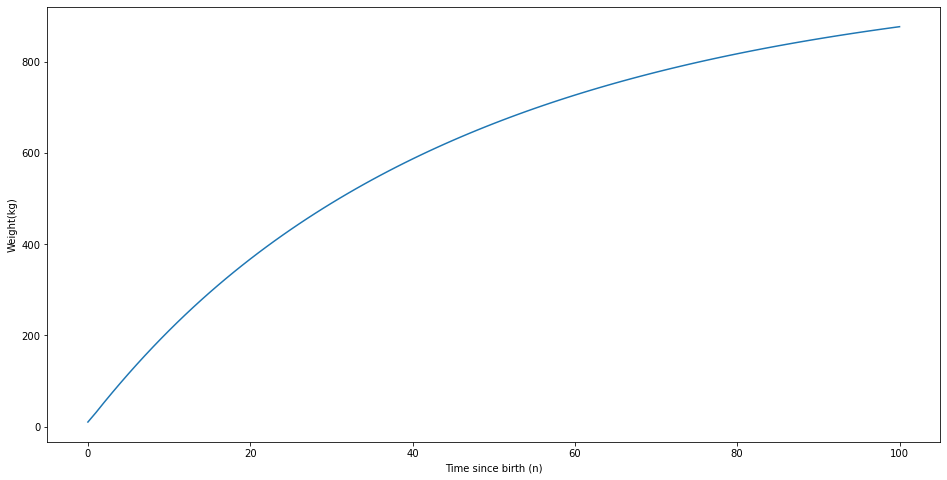

In [43]:
plt.figure(figsize = (16,8))
plt.plot(general['n'], general['W'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')

Text(0, 0.5, 'Prey Population')

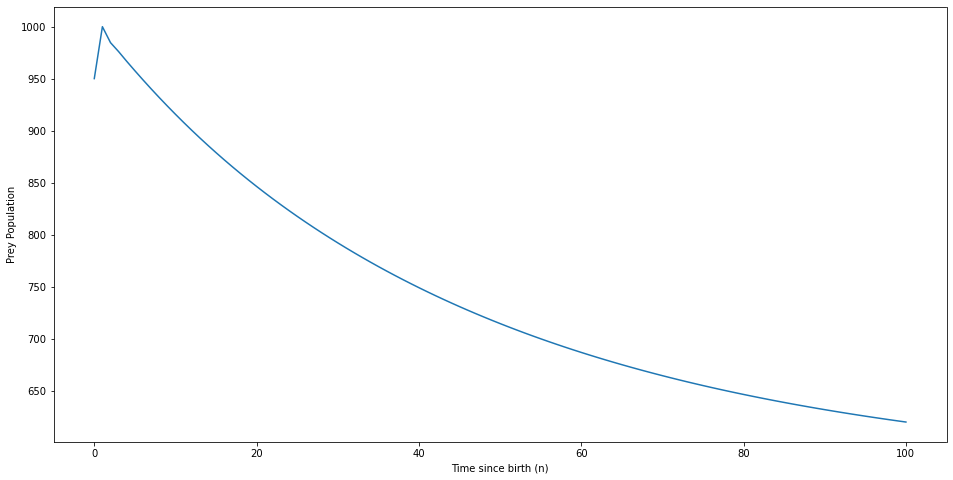

In [44]:
plt.figure(figsize = (16,8))
plt.plot(general['n'], general['P'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')

Text(0, 0.5, 'Height (cm)')

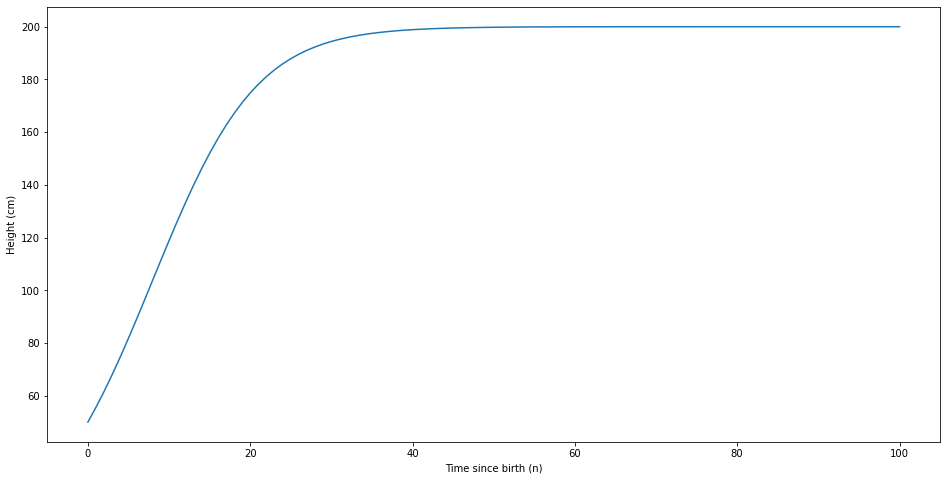

In [45]:
plt.figure(figsize = (16,8))
plt.plot(general['n'], general['H'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')

Text(0, 0.5, 'Calories (kcals)')

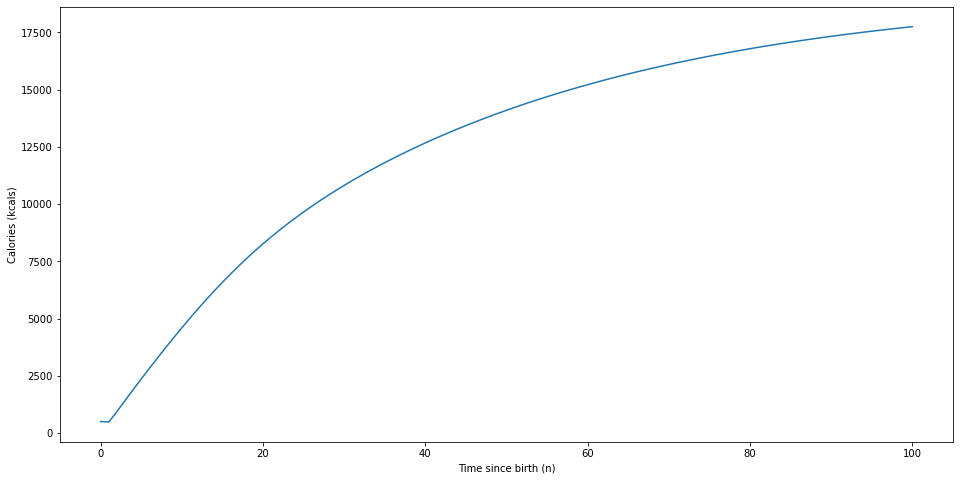

In [46]:
plt.figure(figsize = (16,8))
plt.plot(general['n'], general['C'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')

Text(0, 0.5, 'Height (cm)')

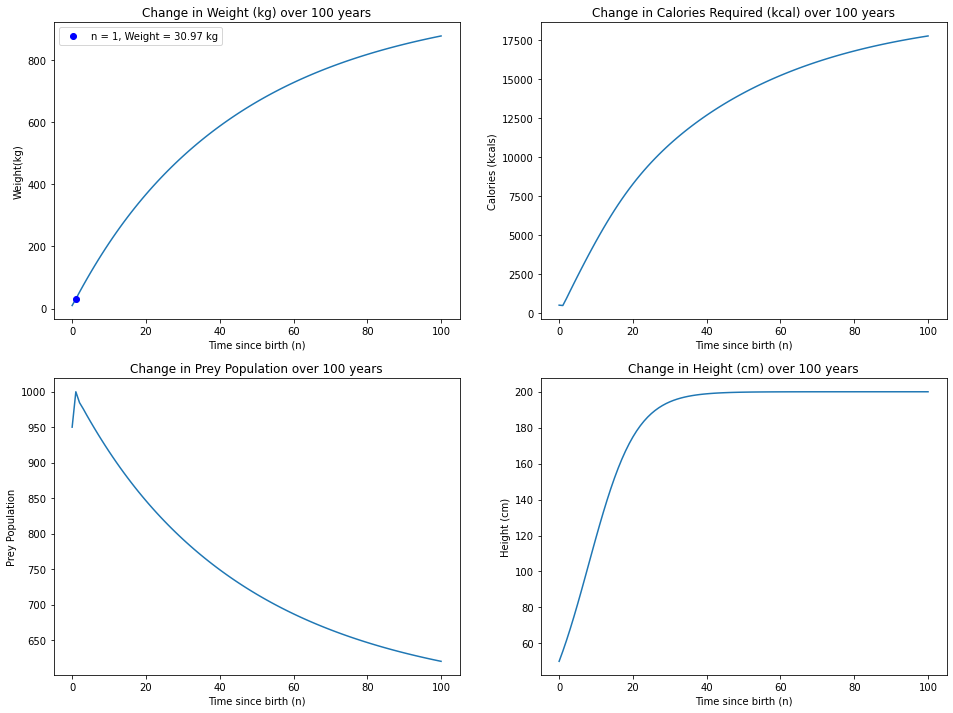

In [47]:
# make a small multiple plot!
plt.figure(figsize = (16,12))

plt.subplot(2,2, 1)
plt.title("Change in Weight (kg) over 100 years")
plt.plot(general['n'], general['W'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Weight(kg)')
plt.plot(general['n'].iloc[1], round(general['W'].iloc[1], 2), 'bo', label = f"n = 1, Weight = {round(general['W'].iloc[1], 2)} kg")
plt.legend()

plt.subplot(2,2, 2)
plt.title("Change in Calories Required (kcal) over 100 years")
plt.plot(general['n'], general['C'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Calories (kcals)')

plt.subplot(2,2, 3)
plt.title("Change in Prey Population over 100 years")
plt.plot(general['n'], general['P'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Prey Population')

plt.subplot(2,2, 4)
plt.title("Change in Height (cm) over 100 years")
plt.plot(general['n'], general['H'])
plt.xlabel('Time since birth (n)')
plt.ylabel('Height (cm)')

# Demographic Stochasticity

Height and weight roughly follow a normal distribution, which indicates that demographic stochasticity should be introduced into the model to make it better resemble real life. We thus add a component of variance to $W$ and $H$ with variance increasing with time.

In [48]:
k = random.normal(200,20)

def f(n, W, C, P, H):
    
    W_n = W - s*(C - (1/365 * alpha * beta * P))
    W_norm = random.normal(W_n, 0.2*n)
    
    C_n = d * ((10 * W) + (6.25 * H) - (5 * n) - 161)
    
    P_n = (1 + b) * (1 - (P / v)) * P + P - (u * P * W) # use a logistic model
    
    H_n = H * (r * (1 - (H/k)) + 1)
    H_norm = random.normal(H_n, 0.1*n)
    
    n += 1
    
    return n, W_norm, C_n, P_n, H_norm

In [49]:
def run_simulation(timestep, X_0):
    
    k_norm = random.normal(200,20)
    
    columns = ['n','W', 'C', 'P', 'H']
    
    df = pd.DataFrame(columns = columns, index = range(timestep + 1)) # create dataframe to store results
    
    df.iloc[0] = X_0
    
    for i in range(1 , timestep + 1):
        X_0 = f(*X_0)
        X_0 = list(X_0)
        for v in range(len(X_0)):
            if X_0[v] < 0:
                X_0[v] = 0
        
        X_0 = tuple(X_0)
        df.iloc[i] = X_0
    return df  

In [50]:
# initial state: n = 0, weight = 10kg, calories per day = 100, prey population = 1000, height  = 50cm
initial = (0, 10, 500, 950, 50) 
general = run_simulation(100, initial)

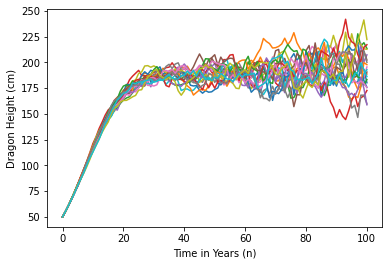

In [51]:
N_runs = 20

for i in range(N_runs):
    X = run_simulation(100,initial)
    Height = X['H']
    plt.plot(np.arange(101),Height)
    plt.xlabel('Time in Years (n)')
    plt.ylabel('Dragon Height (cm)')
    



In [52]:
def f(n, W, C, P, H):
    
    r_n = random.normal(0.15, 0.02)
    
    W_n = W - s*(C - (1/365 * alpha * beta * P))
    W_norm = random.normal(W_n, 0.2*n)
    
    C_n = d * ((10 * W) + (6.25 * H) - (5 * n) - 161)
    
    P_n = (1 + b) * (1 - (P / v)) * P + P - (u * P * W) # use a logistic model
    
    H_n = H * (r_n * (1 - (H/k)) + 1)
    
    n += 1
    
    return n, W_norm, C_n, P_n, H_n

In [53]:
# not used 
def run_simulation(timestep, X_0):
    
    k_norm = random.normal(200,20)
    
    columns = ['n','W', 'C', 'P', 'H']
    
    df = pd.DataFrame(columns = columns, index = range(timestep + 1)) # create dataframe to store results
    
    df.iloc[0] = X_0
    
    for i in range(1 , timestep + 1):
        X_0 = f(*X_0)
        X_0 = list(X_0)
        for v in range(len(X_0)):
            if X_0[v] < 0:
                X_0[v] = 0
        
        X_0 = tuple(X_0)
        df.iloc[i] = X_0
    return df  

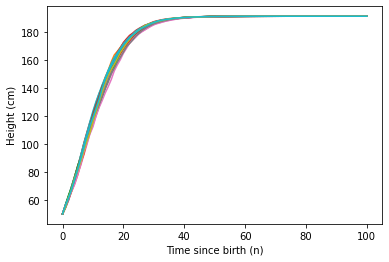

In [54]:
N_runs = 20

for i in range(N_runs):
    X = run_simulation(100,initial)
    Height = X['H']
    plt.plot(np.arange(101),Height)
    plt.xlabel('Time since birth (n)')
    plt.ylabel('Height (cm)')